In [ ]:
"""
Desafio 1: Voce irá entrar em uma conversa do seu whats up. Baixar a conversa em formato txt. Depois disso irá importar usando PYTHON. 
O desafio será, na leitura voce deverá identificar os seguintes pontos:
1 - Quais as palavras mais trocadas na conversa.
2 - Qual o dia da semana que mais troca mensagem.
3 - Qual o horario que mais fala.
4 - Qual o horario que menos fala.
"""

In [82]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

def plotGraph(df, title):
  sns.set(font_scale=1.5)
  plt.figure(figsize=(9, 7))
  ax = sns.barplot(x = df[0], y = df[1])
  ax.set(xlabel="", ylabel = "")
  plt.title(title)
  plt.show()

#listSize
def splitCountList(listDF, quantityValues):
  splittedWordsList = listDF.split()
  countWordsOccurrences = Counter(splittedWordsList)
  mostOccurMessages = countWordsOccurrences.most_common(quantityValues)
  df = pd.DataFrame(mostOccurMessages) 
  return df
  

In [119]:
"""
Read archive and classify lines and variables
"""

mensageWithHeaders = ''
messagesWithoutHeader = ''
dateHourMsg = ''
headerFull = ''
cleanMessages = ''
lines = ''
whatsFile = ''
hourMsg = ''
dateMsg = ''
HourMinuteMsg = ''

whatsFile = open('WhatsApp.txt', 'r')
lines = whatsFile.readline()

while lines:
  lines = whatsFile.readline()
  
  #Read Only Messages with Headers and without some default messages
  if lines.find('/') > 1 and lines.find(': ') > 0 and lines.find('-') > 0 and lines.find('<Arquivo de mídia oculto>') < 1:
    mensageWithHeaders += lines
    dateHourMsg += lines[0:lines.index(':')+3] + ' | '
    dateMsg += lines[0:lines.index(':')-3] + ' | '
    HourMinuteMsg += lines[lines.index(':')-3:lines.index(':')+3] + ' | '
    hourMsg += lines[lines.index(':')-3:lines.index(':')].strip() + ' | '
    headerFull += lines[0:lines.index(': ')+1] + ' | '
    messagesWithoutHeader += lines.split(": ",1)[1]
  elif (lines.find('<Arquivo de mídia oculto>') < 1 and (lines.find('/') < 1 and lines.find(': ') < 1 and lines.find('-') < 1)) : 
    messagesWithoutHeader += lines
  elif (lines.find('<Arquivo de mídia oculto>') > 1):    
    dateHourMsg += lines[0:lines.index(':')+3] + ' | '
    dateMsg += lines[0:lines.index(':')-3] + ' | '
    HourMinuteMsg += lines[lines.index(':')-3:lines.index(':')+3] + ' | '
    hourMsg += lines[lines.index(':')-3:lines.index(':')].strip() + ' | '
    headerFull += lines[0:lines.index(': ')+1] + ' | '


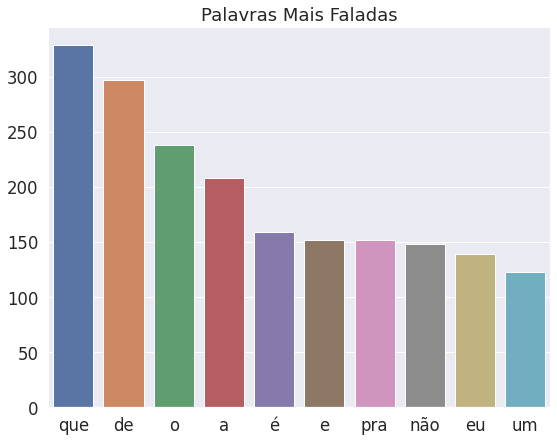

In [120]:
"""
1 - Quais as palavras mais trocadas na conversa.
"""

dfWords = ''

dfWords = splitCountList(messagesWithoutHeader, 10)

plotGraph(dfWords, 'Palavras Mais Faladas')

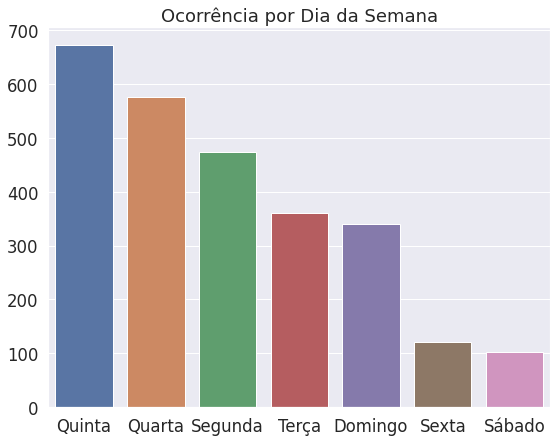

In [121]:
"""
2 - Qual o dia da semana que mais troca mensagem.
"""

i = 0
dateMsgClean = ''
dfWeekDays = ''
weekDays = ''

dateMsgClean = dateMsg.split(" | ")
dateMsgClean = pd.to_datetime(dateMsgClean)
dateMsgClean = dateMsgClean.dropna()

for date in dateMsgClean:
  weekDays = weekDays + ' ' +str(dateMsgClean[i].weekday())
  i = i + 1

dfWeekDays = splitCountList(weekDays, 7)
dfWeekDays = dfWeekDays.replace('0', 'Domingo')
dfWeekDays = dfWeekDays.replace('1', 'Segunda')
dfWeekDays = dfWeekDays.replace('2', 'Terça')
dfWeekDays = dfWeekDays.replace('3', 'Quarta')
dfWeekDays = dfWeekDays.replace('4', 'Quinta')
dfWeekDays = dfWeekDays.replace('5', 'Sexta')
dfWeekDays = dfWeekDays.replace('6', 'Sábado')

plotGraph(dfWeekDays, 'Ocorrência por Dia da Semana')

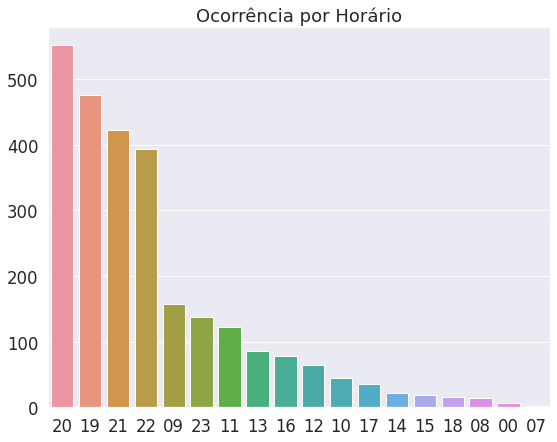

In [123]:
"""
3 - Qual o horario que mais fala.
"""

dfMostOccurHour = ''

hourMsgClean = hourMsg.replace(" | ", " ")

dfMostOccurHour = splitCountList(hourMsgClean,24)

plotGraph(dfMostOccurHour, 'Ocorrência por Horário')

In [ ]:
#References
#https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python
#https://medium.com/@vladbezden/how-to-set-seaborn-plot-size-in-jupyter-notebook-63ffb1415431
#https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
#https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid
#https://www.kite.com/python/answers/how-to-label-axes-in-a-seaborn-bar-plot-in-python
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html